<a href="https://colab.research.google.com/github/gonzalovaldenebro/NaturalLanguageProcessing-Portfolio/blob/main/F5_2_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 195: Natural Language Processing
## Machine Learning with Text Data

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ericmanley/f23-CS195NLP/blob/main/F5_2_MachineLearning.ipynb)


## References

SLP: Vector Semantics and Embeddings, Chapter 6 of Speech and Language Processing by Daniel Jurafsky & James H. Martin https://web.stanford.edu/~jurafsky/slp3/6.pdf

scikit-learn API reference: https://scikit-learn.org/stable/modules/classes.html

In [ ]:
import sys
#!{sys.executable} -m
!{sys.executable} -m pip install datasets keras tensorflow transformers scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.9 MB/s eta 0:00:00


In [ ]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

## Review: A typical machine learning setup

Source: https://github.com/merriekay/S23-CS167-Notes/blob/main/Day11_Scikit_Learn_Practice.ipynb

**Discussion Question:** What are `train_data` and `train_sln` in `dt.fit(train_data,train_sln)`?
* What shapes do they have?

  -

* What data types are involved?

  - The datatype is a character type

In [ ]:
#classic scikit-learn algorithm

#0. import libraries
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

#1. load data
#path = 'datasets/irisData.csv' #'/content/drive/MyDrive/CS167/datasets/irisData.csv'
path = "https://raw.githubusercontent.com/ericmanley/F23-CS195NLP/main/data/irisData.csv"
iris_data = pandas.read_csv(path)

#2. split data
predictors = ['sepal length', 'sepal width','petal length', 'petal width']
target = "species"
train_data, test_data, train_sln, test_sln = \
        train_test_split(iris_data[predictors], iris_data[target], test_size = 0.2, random_state=41)

#3. Create classifier/regressor object (change these parameters for Exercise #1)
dt = tree.DecisionTreeClassifier()

#4. Call fit (to train the classification/regression model)
dt.fit(train_data,train_sln)

#5. Call predict to generate predictions
iris_predictions = dt.predict(test_data)

#6. Call a metric function to measure performance
print("Accuracy:", metrics.accuracy_score(test_sln,iris_predictions))

# Show the acutal and predicted (this isn't necessary, but may help catch bugs)
print("___PREDICTED___ \t  ___ACTUAL___")
for i in range(len(test_sln)):
    print(iris_predictions[i],"\t\t", test_sln.iloc[i])

print("-------------------------------------------------------")
#print out a confusion matrix
iris_labels= ["Iris-setosa", "Iris-versicolor","Iris-virginica"]
conf_mat = metrics.confusion_matrix(test_sln, iris_predictions, labels=iris_labels)
print(pandas.DataFrame(conf_mat,index = iris_labels, columns = iris_labels))


Accuracy: 0.9
___PREDICTED___ 	  ___ACTUAL___
Iris-versicolor 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-virginica 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versic

In [ ]:
train_sln

79     Iris-versicolor
54     Iris-versicolor
106     Iris-virginica
90     Iris-versicolor
145     Iris-virginica
            ...       
26         Iris-setosa
89     Iris-versicolor
65     Iris-versicolor
80     Iris-versicolor
140     Iris-virginica
Name: species, Length: 120, dtype: object

## Making it work for text data

To prepare your text data, you'll need to
* tokenize
* encode (get a numerical representation)

Let's practice preparing a Hugging Face dataset for spam detection.

https://huggingface.co/datasets/Deysi/spam-detection-dataset

In [ ]:
from datasets import load_dataset

data = load_dataset("Deysi/spam-detection-dataset")

data

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/8175 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2725 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8175
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2725
    })
})

Let's look at a couple examples:

In [ ]:
print( data["train"]["text"][32] )

print( data["train"]["label"][32] )

Get rich quick!!! Make $$$ in just 30 minutes, GUARANTEED! No skills or experience required! Just send me a small fee and I'll give you access to my exclusive money-making secrets!


spam


In [ ]:
print( data["train"]["text"][35] )

print( data["train"]["label"][35] )

First time poster in this sub, and I'm only an amateur with data compared to many.

But, want I want to do is figure out the partisan lean for each of the new state house districts in Texas. This type of analysis is easily available for the federal districts at sites like 538 ( https://projects.fivethirtyeight.com/redistricting-2022-maps ), but I want to do it at the state house level.

Then, as a second step, it'd be great to have the correct data to draw my own state congressional districts and derive partisan leans (as well as determine the racial makeup). But, this would be a much larger project for the future.

Anyway, I'm struggling to figure out where to even start. I could get precinct data from the MIT data lab, but state districts break up even precincts, so they wouldn't be totally accurate.

Thanks in advance for any thoughts or help!
not_spam


## Tokenizing

This could be done with any of the tokenization methods we've looked at.

Let's try it with the WordPiece algorithm (used by the BERT models)

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

tokens = tokenizer.tokenize(data["train"]["text"][35])

print(tokens)

['first', 'time', 'poster', 'in', 'this', 'sub', ',', 'and', 'i', "'", 'm', 'only', 'an', 'amateur', 'with', 'data', 'compared', 'to', 'many', '.', 'but', ',', 'want', 'i', 'want', 'to', 'do', 'is', 'figure', 'out', 'the', 'partisan', 'lean', 'for', 'each', 'of', 'the', 'new', 'state', 'house', 'districts', 'in', 'texas', '.', 'this', 'type', 'of', 'analysis', 'is', 'easily', 'available', 'for', 'the', 'federal', 'districts', 'at', 'sites', 'like', '53', '##8', '(', 'https', ':', '/', '/', 'projects', '.', 'five', '##thi', '##rt', '##ye', '##ight', '.', 'com', '/', 'red', '##ist', '##ricting', '-', '202', '##2', '-', 'maps', ')', ',', 'but', 'i', 'want', 'to', 'do', 'it', 'at', 'the', 'state', 'house', 'level', '.', 'then', ',', 'as', 'a', 'second', 'step', ',', 'it', "'", 'd', 'be', 'great', 'to', 'have', 'the', 'correct', 'data', 'to', 'draw', 'my', 'own', 'state', 'congressional', 'districts', 'and', 'derive', 'partisan', 'leans', '(', 'as', 'well', 'as', 'determine', 'the', 'racial

## Integer Encodings

The Hugging Face tokenizers assign a numerical ID to each token.

In [ ]:
tokenizer.convert_tokens_to_ids(tokens)

[2034,
 2051,
 13082,
 1999,
 2023,
 4942,
 1010,
 1998,
 1045,
 1005,
 1049,
 2069,
 2019,
 5515,
 2007,
 2951,
 4102,
 2000,
 2116,
 1012,
 2021,
 1010,
 2215,
 1045,
 2215,
 2000,
 2079,
 2003,
 3275,
 2041,
 1996,
 14254,
 8155,
 2005,
 2169,
 1997,
 1996,
 2047,
 2110,
 2160,
 4733,
 1999,
 3146,
 1012,
 2023,
 2828,
 1997,
 4106,
 2003,
 4089,
 2800,
 2005,
 1996,
 2976,
 4733,
 2012,
 4573,
 2066,
 5187,
 2620,
 1006,
 16770,
 1024,
 1013,
 1013,
 3934,
 1012,
 2274,
 15222,
 5339,
 6672,
 18743,
 1012,
 4012,
 1013,
 2417,
 2923,
 28827,
 1011,
 16798,
 2475,
 1011,
 7341,
 1007,
 1010,
 2021,
 1045,
 2215,
 2000,
 2079,
 2009,
 2012,
 1996,
 2110,
 2160,
 2504,
 1012,
 2059,
 1010,
 2004,
 1037,
 2117,
 3357,
 1010,
 2009,
 1005,
 1040,
 2022,
 2307,
 2000,
 2031,
 1996,
 6149,
 2951,
 2000,
 4009,
 2026,
 2219,
 2110,
 7740,
 4733,
 1998,
 18547,
 14254,
 12671,
 1006,
 2004,
 2092,
 2004,
 5646,
 1996,
 5762,
 5789,
 1007,
 1012,
 2021,
 1010,
 2023,
 2052,
 2022,
 1037,
 21

Let's get the encodings for all the examples

In [ ]:
encodings = []
for curr_example in data["train"]["text"]:
    curr_tokens = tokenizer.tokenize(curr_example)
    curr_encodings = tokenizer.convert_tokens_to_ids(curr_tokens)

    encodings.append(curr_encodings)

#display some of them
print(encodings[32:35])

Token indices sequence length is longer than the specified maximum sequence length for this model (536 > 512). Running this sequence through the model will result in indexing errors


[[2131, 4138, 4248, 999, 999, 999, 2191, 1002, 1002, 1002, 1999, 2074, 2382, 2781, 1010, 12361, 999, 2053, 4813, 2030, 3325, 3223, 999, 2074, 4604, 2033, 1037, 2235, 7408, 1998, 1045, 1005, 2222, 2507, 2017, 3229, 2000, 2026, 7262, 2769, 1011, 2437, 7800, 999], [2131, 4138, 4248, 1998, 3733, 2007, 16021, 2696, 15671, 2232, 999, 999, 2024, 2017, 5458, 1997, 2108, 3631, 1998, 2542, 3477, 5403, 3600, 2000, 3477, 5403, 3600, 1029, 2079, 2017, 2215, 2000, 2191, 2070, 3733, 2769, 2302, 5128, 1999, 2151, 2613, 3947, 1029, 2092, 1010, 2298, 2053, 2582, 2138, 16021, 2696, 15671, 2232, 2038, 2288, 2017, 3139, 999, 2007, 2256, 6208, 2291, 1010, 2017, 2064, 2191, 2039, 2000, 1002, 6694, 1037, 2154, 2074, 2011, 16663, 1010, 6631, 1010, 1998, 15591, 2006, 8466, 1012, 2009, 1005, 1055, 2008, 3722, 999, 2053, 4813, 2030, 3325, 4072, 1010, 2074, 1037, 26381, 1998, 2019, 4274, 4434, 1012, 1998, 1996, 2190, 2112, 2003, 1010, 2017, 2064, 2707, 7414, 3202, 1012, 2053, 3403, 2005, 6226, 2015, 2030, 8552, 36

 Note that the warning is telling you that the data set has token sequences that are too big for the BERT model - it'll still produce the correct tokens, though, and we can use them.

## Discussion Question

The hope is that we could now use the encodings as the predictors and fit a model to them like this.

But this doesn't work - what is the problem?

In [ ]:
dt.fit(encodings,data["train"]["label"])

ValueError: ignored

In [ ]:
print(data["train"]["label"][0])

not_spam


In [ ]:
encodings[0]

[4931,
 1045,
 2572,
 2559,
 2005,
 1060,
 9447,
 20220,
 2951,
 13462,
 2015,
 2064,
 2017,
 3073,
 2033,
 2007,
 1996,
 2168]

## A working example

In [ ]:
from transformers import AutoTokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

data = load_dataset("Deysi/spam-detection-dataset")

def prepare_text_data(text_list,tokenizer,encoded_length=512):
    encodings = []
    for curr_example in text_list:
        curr_tokens = tokenizer.tokenize(curr_example)
        curr_encodings = tokenizer.convert_tokens_to_ids(curr_tokens)

        # truncate sequences that are too long
        if len(curr_encodings) > encoded_length:
            curr_encodings = curr_encodings[:encoded_length]
        # pad sequences that are too short with 0s
        elif len(curr_encodings) < encoded_length:
            curr_encodings = curr_encodings + [0]*(encoded_length-len(curr_encodings))

        encodings.append(curr_encodings)

    return encodings

train_encoding = prepare_text_data(data["train"]["text"],tokenizer)
train_labels = data["train"]["label"]
test_encoding = prepare_text_data(data["test"]["text"],tokenizer)
test_labels = data["test"]["label"]

lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(train_encoding,train_labels)

predictions = lr_model.predict(test_encoding)

print( accuracy_score(test_labels,predictions) )

Token indices sequence length is longer than the specified maximum sequence length for this model (536 > 512). Running this sequence through the model will result in indexing errors


0.7258715596330275


Token indices sequence length is longer than the specified maximum sequence length for this model (536 > 512). Running this sequence through the model will result in indexing errors
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepr

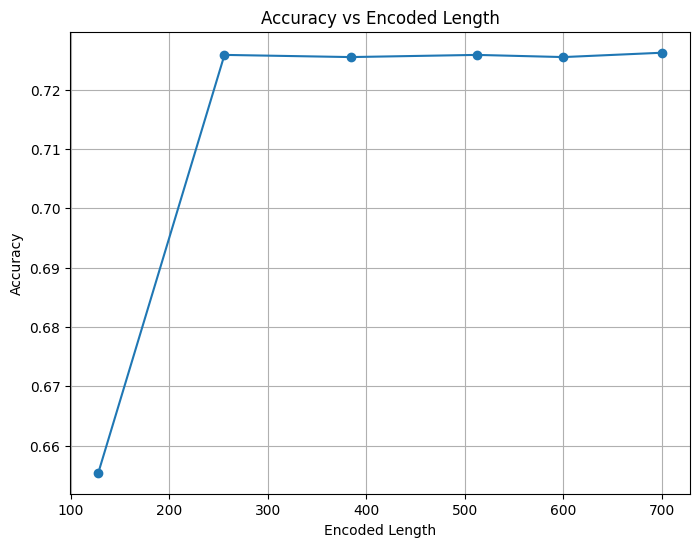

In [ ]:
from transformers import AutoTokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Import the necessary libraries
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Load your dataset
data = load_dataset("Deysi/spam-detection-dataset")

# Define a list of values for encoded_length that you want to test
encoded_lengths = [128, 256, 384, 512, 600, 700]  # You can modify this list

# Initialize lists to store accuracy scores for different encoded_length values
accuracy_scores = []

for encoded_length in encoded_lengths:
    train_encoding = prepare_text_data(data["train"]["text"], tokenizer, encoded_length)
    train_labels = data["train"]["label"]
    test_encoding = prepare_text_data(data["test"]["text"], tokenizer, encoded_length)
    test_labels = data["test"]["label"]

    lr_model = LogisticRegression(max_iter=2000)
    lr_model.fit(train_encoding, train_labels)

    predictions = lr_model.predict(test_encoding)

    accuracy = accuracy_score(test_labels, predictions)
    accuracy_scores.append(accuracy)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(encoded_lengths, accuracy_scores, marker='o')
plt.title("Accuracy vs Encoded Length")
plt.xlabel("Encoded Length")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


## Group Discussion

Is this a good accuracy score?

  - I am not fully sure, I would like to compare it against. We also want to check the proportion of the data.

What context do we need to interpret this?

  - We have to look at the fact that we are looking at binary data, it might be difficult.

## Group Exercise

Have everyone at your table agree on another classification model that you've used before.

Run this code but with the other model. How do the results compare?

https://scikit-learn.org/stable/modules/classes.html

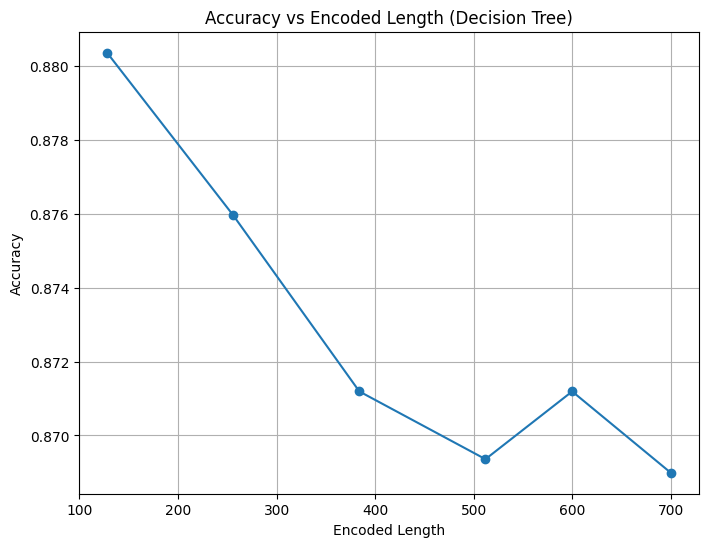

In [ ]:
from transformers import AutoTokenizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset

# Define a function to prepare text data using the tokenizer and specified encoded length
def prepare_text_data(texts, tokenizer, encoded_length):
    tokenized = tokenizer(texts, padding='max_length', truncation=True, max_length=encoded_length, return_tensors="np")
    return tokenized

# Import the necessary libraries
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Load your dataset
data = load_dataset("Deysi/spam-detection-dataset")

# Define a list of values for encoded_length that you want to test
encoded_lengths = [128, 256, 384, 512, 600, 700]  # You can modify this list

# Initialize lists to store accuracy scores for different encoded_length values
accuracy_scores = []

for encoded_length in encoded_lengths:
    train_encoding = prepare_text_data(data["train"]["text"], tokenizer, encoded_length)
    train_labels = data["train"]["label"]
    test_encoding = prepare_text_data(data["test"]["text"], tokenizer, encoded_length)
    test_labels = data["test"]["label"]

    train_features = train_encoding['input_ids']  # Extract the input_ids from the encoded data
    test_features = test_encoding['input_ids']

    dt_model = DecisionTreeClassifier()
    dt_model.fit(train_features, train_labels)

    predictions = dt_model.predict(test_features)

    accuracy = accuracy_score(test_labels, predictions)
    accuracy_scores.append(accuracy)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(encoded_lengths, accuracy_scores, marker='o')
plt.title("Accuracy vs Encoded Length (Decision Tree)")
plt.xlabel("Encoded Length")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


## Group Exercise

Pick a different *text classification* dataset and test the accuracy of this approach on that data. How do they compare?

In [ ]:
from datasets import load_dataset

data = load_dataset("climate_fever")
data

DatasetDict({
    test: Dataset({
        features: ['claim_id', 'claim', 'claim_label', 'evidences'],
        num_rows: 1535
    })
})

In [ ]:
# Split the dataset into training and testing sets
train_dataset, test_dataset = train_test_split(data['test'], test_size=0.2, random_state=42)

In [ ]:
print(data.keys())


dict_keys(['test'])


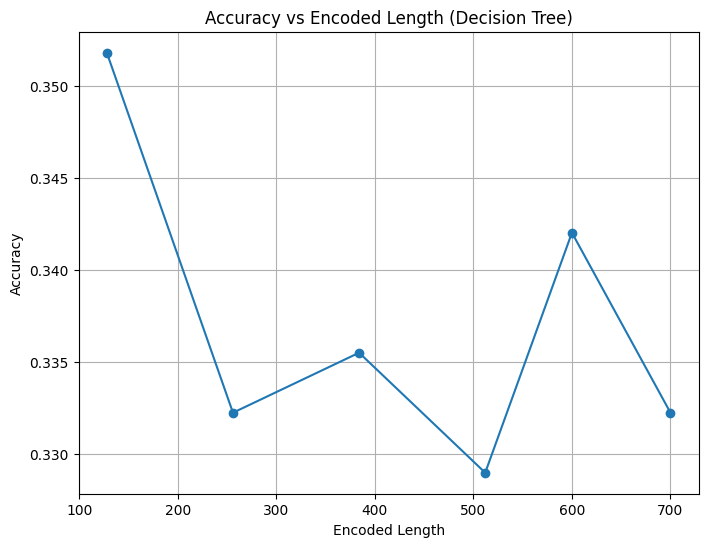

In [ ]:
from transformers import AutoTokenizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from datasets import load_dataset

# Define a function to prepare text data using the tokenizer and specified encoded length
def prepare_text_data(texts, tokenizer, encoded_length):
    tokenized = tokenizer(texts, padding='max_length', truncation=True, max_length=encoded_length, return_tensors="np")
    return tokenized

# Import the necessary libraries
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

data = load_dataset("climate_fever")

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data['test'], test_size=0.2, random_state=42)

# Define a list of values for encoded_length that you want to test
encoded_lengths = [128, 256, 384, 512, 600, 700]

# Initialize lists to store accuracy scores for different encoded_length values
accuracy_scores = []

for encoded_length in encoded_lengths:
    train_encoding = prepare_text_data(train_data["claim"], tokenizer, encoded_length)
    train_labels = train_data["claim_label"]
    test_encoding = prepare_text_data(test_data["claim"], tokenizer, encoded_length)
    test_labels = test_data["claim_label"]

    train_features = train_encoding['input_ids']
    test_features = test_encoding['input_ids']

    dt_model = DecisionTreeClassifier()
    dt_model.fit(train_features, train_labels)

    predictions = dt_model.predict(test_features)

    accuracy = accuracy_score(test_labels, predictions)
    accuracy_scores.append(accuracy)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(encoded_lengths, accuracy_scores, marker='o')
plt.title("Accuracy vs Encoded Length (Decision Tree)")
plt.xlabel("Encoded Length")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


## Problems with this encoding

The numerical encoding we've used may not work well in many situations.

Think about the predictor features our model is using

`['first', 'time', 'poster', 'in', 'this', 'sub',`

`[2034, 2051, 13082, 1999, 2023, 4942,`

The first feature is "first token in the sequence"

2nd feature is "second token in the sequence"

etc.

If a word appears in different positions in two different sequences, the model won't inherently recognize that it's the same word

The way words get mapped to numbers is arbitrary - there's no relationship between words that have close numbers

In [ ]:
print( tokenizer.encode("first",add_special_tokens=False) )
print( tokenizer.encode("time",add_special_tokens=False) )

[2034]
[2051]


## Bag-of-Words Encoding

Choose vocabulary (say 5000 most common words) one column for each word

row contains counts for each word

**Example**

*Sentence 1:* "The cat sat on the hat"

*Sentence 2:* "The dog ate the cat and the hat"

*Vocabulary:* { the, cat, sat, on, hat, dog, ate, and }


|            | the | cat | sat | on | hat | dog | ate | and |
|------------|-----|-----|-----|----|-----|-----|-----|-----|
| Sentence 1 | 2   | 1   | 1   | 1  | 1   | 0   | 0   | 0   |
| Sentence 2 | 3   | 1   | 0   | 0  | 1   | 1   | 1   | 1   |


**The downside:** this doesn't maintain any information about word order - thus the "bag" of words

`scikit-learn` provides a Bag-of-Words encoder called `CountVectorizer`


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

data = load_dataset("Deysi/spam-detection-dataset")

train_texts = data["train"]["text"]
train_labels = data["train"]["label"]
test_texts = data["test"]["text"]
test_labels = data["test"]["label"]

# Consider top 5000 frequent words
# remove stop words
vectorizer = CountVectorizer(max_features=5000,stop_words="english")
vectorizer.fit(train_texts)

train_vectors = vectorizer.transform(train_texts)
test_vectors = vectorizer.transform(test_texts)

lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(train_vectors,train_labels)

predictions = lr_model.predict(test_vectors)

print( accuracy_score(test_labels,predictions) )

0.9952293577981651


## Check if we have overfitting

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

data = load_dataset("Deysi/spam-detection-dataset")

# Split the data into a training set and a validation set
train_texts, val_texts, train_labels, val_labels = train_test_split(
    data["train"]["text"], data["train"]["label"], test_size=0.2, random_state=42
)

test_texts = data["test"]["text"]
test_labels = data["test"]["label"]

# Consider top 5000 frequent words and remove stop words
vectorizer = CountVectorizer(max_features=5000, stop_words="english")
vectorizer.fit(train_texts)

train_vectors = vectorizer.transform(train_texts)
val_vectors = vectorizer.transform(val_texts)
test_vectors = vectorizer.transform(test_texts)

lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(train_vectors, train_labels)

# Make predictions on the training, validation, and test sets
train_predictions = lr_model.predict(train_vectors)
val_predictions = lr_model.predict(val_vectors)
test_predictions = lr_model.predict(test_vectors)

# Evaluate accuracy on all sets
train_accuracy = accuracy_score(train_labels, train_predictions)
val_accuracy = accuracy_score(val_labels, val_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.999388379204893
Validation Accuracy: 0.9944954128440368
Test Accuracy: 0.9952293577981651


## TD-IDF Encoding

**TF-IDF:** Term Frequency - Inverse Document Frequency

**Term Frequency:** How often does the word appear in the example, like CountVectorizer
* actually take the $\log$ of it

**Document Frequency:** What fraction of the *documents* (or *training-examples*) does the word appear in?

**Inverse Document Frequency:** (number of documents) / (number of documents containing the word)
* if a word is in only a few documents, you get a big number
* if a word appears in lots of documents, you get a small number

When encoding a new example, multiply the Term Frequency of the word in this example by the Inverse Document Frequency of the training set
* gives higher weight to words that are differentiators
* stop words should automatically be de-emphasized

**Example:**
Document collection: all of Shakespeare's plays

The word `Romeo` appears 113 times but only in 1 document

The word `action` appears 113 time but in 31 documents

so Romeo will get a much higher weight


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

data = load_dataset("Deysi/spam-detection-dataset")

train_texts = data["train"]["text"]
train_labels = data["train"]["label"]
test_texts = data["test"]["text"]
test_labels = data["test"]["label"]

# Consider top 5000 frequent words
vectorizer = TfidfVectorizer(max_features=5000)
vectorizer.fit(train_texts)

train_vectors = vectorizer.transform(train_texts)
test_vectors = vectorizer.transform(test_texts)

lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(train_vectors,train_labels)

predictions = lr_model.predict(test_vectors)

print( accuracy_score(test_labels,predictions) )

0.9952293577981651


## Applied Exploration

Try the Integer Encoding, Count Vectorizer, and TD-IDF on a *new dataset*
* use at least three different classification models

Give a short write-up on the following
* Describe your dataset, including the distribution of the target variable
* Describe the results of the machine learning experiment
* Interpret the results - why do you think each of the encodings and algorithms performed the way they did?

## if time....

Here's some code for building a multilayer neural network in Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

data = load_dataset("Deysi/spam-detection-dataset")

train_texts = data["train"]["text"]
train_labels = data["train"]["label"]
test_texts = data["test"]["text"]
test_labels = data["test"]["label"]

# Consider top 5000 frequent words
vectorizer = TfidfVectorizer(max_features=5000)
vectorizer.fit(train_texts)

train_vectors = vectorizer.transform(train_texts)
test_vectors = vectorizer.transform(test_texts)

# the sklearn vectors need to be converted to numpy arrays for this library
train_vectors_arrays = train_vectors.toarray()
test_vectors_arrays = test_vectors.toarray()
# Convert string labels to binary labels
train_labels_array = np.array([1 if label == "spam" else 0 for label in train_labels])
test_labels_array = np.array([1 if label == "spam" else 0 for label in test_labels])



model = Sequential()
model.add(Dense(20, input_dim=5000, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_vectors_arrays, train_labels_array, epochs=10, verbose=1)

loss, accuracy = model.evaluate(test_vectors_arrays, test_labels_array)
print(f"Test accuracy: {accuracy*100:.2f}%")

Epoch 1/10
256/256 [==============================] - 0s 808us/step - loss: 0.2739 - accuracy: 0.9697
Epoch 2/10
256/256 [==============================] - 0s 805us/step - loss: 0.0388 - accuracy: 0.9989
Epoch 3/10
256/256 [==============================] - 0s 796us/step - loss: 0.0156 - accuracy: 0.9991
Epoch 4/10
256/256 [==============================] - 0s 772us/step - loss: 0.0088 - accuracy: 0.9993
Epoch 5/10
256/256 [==============================] - 0s 773us/step - loss: 0.0058 - accuracy: 0.9995
Epoch 6/10
256/256 [==============================] - 0s 771us/step - loss: 0.0041 - accuracy: 0.9996
Epoch 7/10
256/256 [==============================] - 0s 765us/step - loss: 0.0031 - accuracy: 0.9996
Epoch 8/10
256/256 [==============================] - 0s 816us/step - loss: 0.0024 - accuracy: 0.9996
Epoch 9/10
256/256 [==============================] - 0s 830us/step - loss: 0.0019 - accuracy: 0.9996
Epoch 10/10
86/86 [==============================] - 0s 535us/step - loss: 0.0052 